In [3]:
from musicnet.utils import load_instruments_and_notes, train_ids, Track, instruments_vocab, notes_vocab
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import math

In [6]:
ids_train = train_ids()

In [7]:
min_end_beat = math.inf
max_end_beat = 0

vc_dict = dict()
for id in ids_train:
    csv_data = Track(id).read_csv_data()
    vc = csv_data["end_beat"].round(4).value_counts()
    for v in vc:
        min_end_beat = min(min_end_beat, csv_data["end_beat"].min())
        max_end_beat = max(max_end_beat, csv_data["end_beat"].max())

print(min_end_beat)
print(max_end_beat)

0.00833333333333
102.979166667


In [9]:
notes = Track(ids_train[-1]).read_csv_data()
notes

,start_time,end_time,instrument,note,start_beat,end_beat,note_value
0,58846,98782,41,58,1.0,1.062500,Quarter
1,96222,136670,41,65,2.0,0.979167,Quarter
2,137694,174558,1,70,3.0,0.979167,Quarter
3,137694,174558,1,56,3.0,0.979167,Quarter
4,137694,174558,1,58,3.0,0.979167,Quarter
...,...,...,...,...,...,...,...
3870,20646878,20715998,1,75,1142.0,0.979167,Quarter
3871,20646878,20715998,1,82,1142.0,0.979167,Quarter
3872,20646878,20715998,1,79,1142.0,0.979167,Quarter
3873,20646878,20715998,1,39,1142.0,0.979167,Quarter


In [10]:
notes["start_time_s"] = np.round(notes["start_time"] / 44100, 4)
notes["end_time_s"] = np.round(notes["end_time"] / 44100, 4)
notes["duration"] = (notes["end_time_s"] - notes["start_time_s"])

In [13]:
notes.groupby("end_beat")["note_value"].value_counts()

end_beat   note_value
0.229167   Sixteenth      8
0.250000   Sixteenth     16
0.260417   Sixteenth      2
0.270833   Sixteenth     10
0.302083   Triplet        1
                         ..
8.979167   Whole          5
12.125000  Unknown        1
12.145833  Unknown        1
12.166667  Unknown        2
20.979167  Unknown        1
Name: count, Length: 172, dtype: int64

In [14]:
notes.groupby("end_beat")["duration"].describe()

,count,mean,std,min,25%,50%,75%,max
end_beat,,,,,,,,
0.229167,8.0,0.179975,0.019599,0.1510,0.168400,0.18570,0.197400,0.1974
0.250000,16.0,0.164694,0.021705,0.1161,0.162500,0.17410,0.174100,0.1974
0.260417,2.0,0.261250,0.041083,0.2322,0.246725,0.26125,0.275775,0.2903
0.270833,10.0,0.233350,0.045608,0.2090,0.211875,0.22055,0.220600,0.3599
0.302083,1.0,0.255400,NaN,0.2554,0.255400,0.25540,0.255400,0.2554
...,...,...,...,...,...,...,...,...
8.979167,5.0,1.996900,0.139317,1.7879,1.938900,2.03170,2.078200,2.1478
12.125000,1.0,2.554200,NaN,2.5542,2.554200,2.55420,2.554200,2.5542
12.145833,1.0,2.554200,NaN,2.5542,2.554200,2.55420,2.554200,2.5542


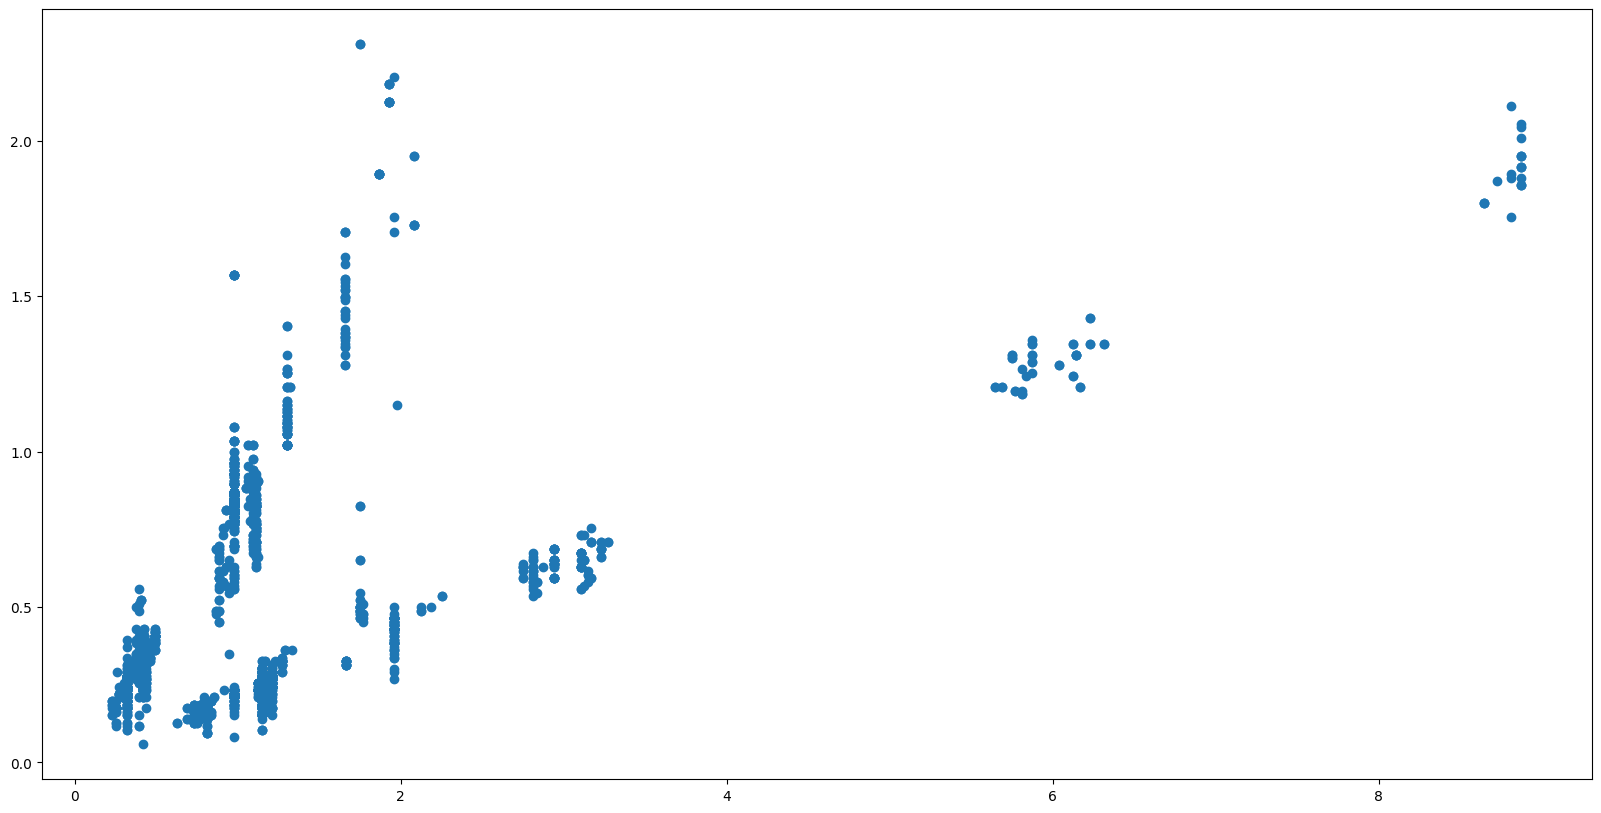

In [18]:
plt.figure(figsize=(20, 10))
plt.scatter(notes[notes["instrument"] == 1]["end_beat"].to_numpy(), notes[notes["instrument"] == 1]["duration"].to_numpy())